## Multi face detection with Dlib

In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dlib's face detector
detector = dlib.get_frontal_face_detector()

# Load the pre-trained facial landmark predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Load the face image
img = cv2.imread('./faces library/multi.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# Make a copy for drawing landmarks
img_with_landmarks = img_rgb.copy()

# Detect faces in the image
faces = detector(img_with_landmarks)

# Loop through each face detected
for i, face in enumerate(faces):
    # Get the landmarks/parts for the face
    shape = predictor(img_rgb, face)
    
    # Draw dots on each landmark and label the face
    for part in shape.parts():
        cv2.circle(img_with_landmarks, (part.x, part.y), 1, (0, 255, 0), -1)
    
    # Label each face - ensure coordinates are within image bounds
    x_label, y_label = max(face.left(), 0), max(face.top() - 10, 0)
    cv2.putText(img_with_landmarks, f"Face{i+1}", (x_label, y_label), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

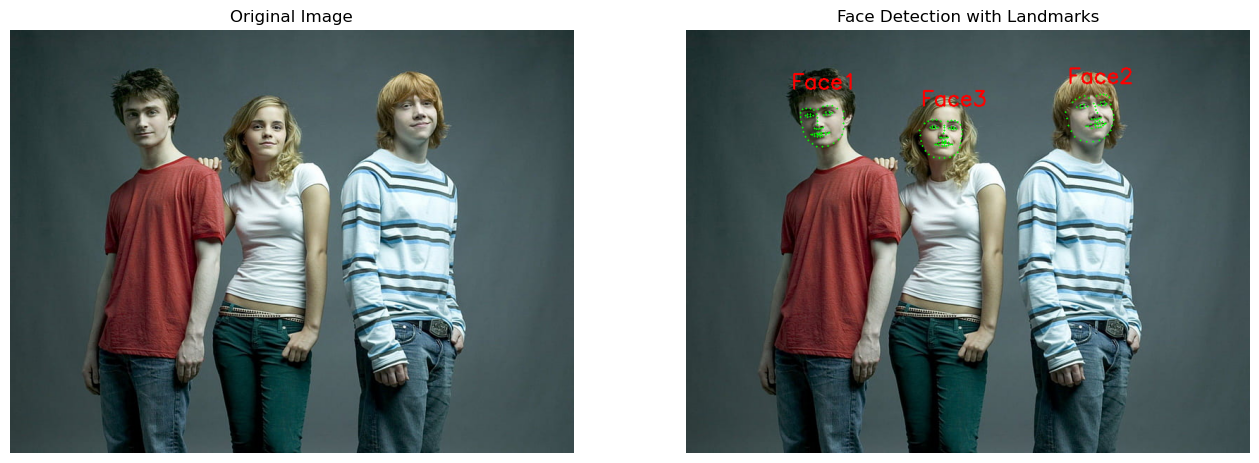

In [4]:
# Display both the original and detected images using matplotlib
plt.figure(figsize=(16, 8))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Image with Detected Facial Landmarks
plt.subplot(1, 2, 2)
plt.imshow(img_with_landmarks)
plt.title('Face Detection with Landmarks')
plt.axis('off')

plt.show()

### Add a sticker to multi faces

In [5]:
# Function to overlay a transparent image onto another image
def overlay_transparent(background, overlay, x, y):
    bg_height, bg_width = background.shape[:2]
    if x >= bg_width or y >= bg_height:
        return background

    h, w = overlay.shape[:2]
    if x + w > bg_width:
        w = bg_width - x
        overlay = overlay[:, :w]

    if y + h > bg_height:
        h = bg_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate([overlay, np.ones((overlay.shape[0], overlay.shape[1], 1), dtype=overlay.dtype) * 255], axis=2)

    overlay_img = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_img

    return background

In [6]:
# Load glasses image
glasses = cv2.imread('./stickers library/glasses/rainbow-glasses.png', cv2.IMREAD_UNCHANGED)

# A copy of the original image
img_with_stickers = img_rgb.copy()

for face in faces:
    landmarks = predictor(img_rgb, face)

    # Assuming that the landmarks 36 to 41 are for the left eye, and 42 to 47 are for the right eye
    left_eye = [landmarks.part(i) for i in range(37, 43)]
    right_eye = [landmarks.part(i) for i in range(43, 49)]

    # Calculate the bounding box for the glasses based on the eye landmarks
    glasses_width = int(abs(left_eye[0].x - right_eye[3].x)*1.9)
    glasses_height = int(glasses_width * glasses.shape[0] / glasses.shape[1])

    # Resize the glasses image
    resized_glasses = cv2.resize(glasses, (glasses_width, glasses_height))

    # Calculate the position for the glasses
    y1 = min([point.y for point in left_eye + right_eye]) - int(0.4 * glasses_height)
    y2 = y1 + glasses_height
    x1 = (left_eye[0].x) - int(0.2 * glasses_width)
    x2 = x1 + glasses_width

    # Overlay the glasses on the image
    img_with_stickers = overlay_transparent(img_with_stickers, resized_glasses, x1, y1)

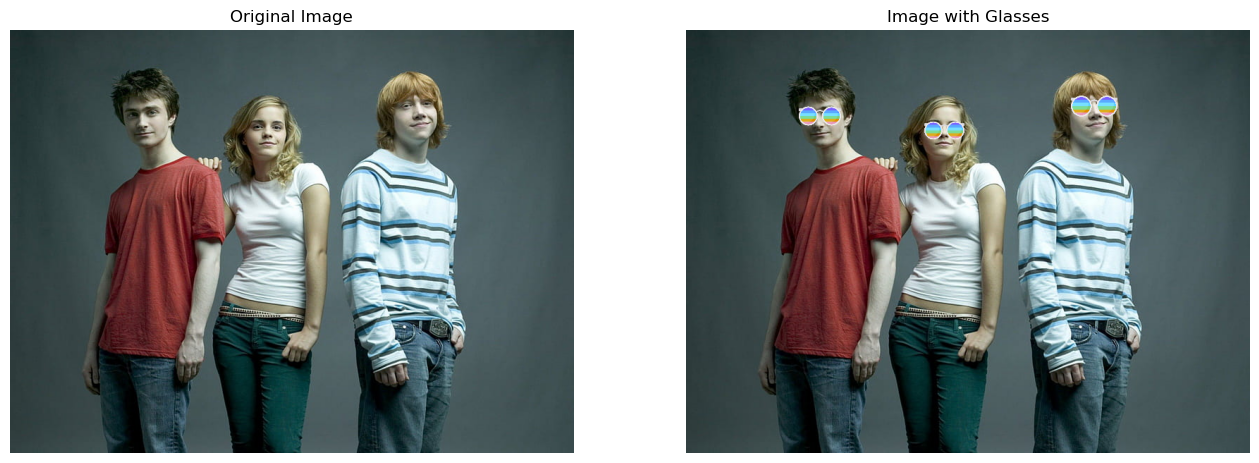

In [7]:
# Display the original and detected images using Matplotlib
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_with_stickers)
plt.title('Image with Glasses')
plt.axis('off')

plt.show()

### Add a sticker to single selected face

In [8]:
# Load glasses image
glasses_1 = cv2.imread('./stickers library/glasses/cool-sunglasses.png', cv2.IMREAD_UNCHANGED)
glasses_2 = cv2.imread('./stickers library/glasses/gray-sunglasses.png', cv2.IMREAD_UNCHANGED)
glasses_3 = cv2.imread('./stickers library/glasses/rainbow-glasses.png', cv2.IMREAD_UNCHANGED)
glasses_group = [glasses_1, glasses_2, glasses_3]


# A copy of the original image
single_face_with_stickers = img_rgb.copy()


landmarks = predictor(img_rgb, face)

for i, face in enumerate(faces):
    landmarks = predictor(img_rgb, face)
    
    glasses = glasses_group[i]
    

    # Assuming that the landmarks 36 to 41 are for the left eye, and 42 to 47 are for the right eye
    left_eye = [landmarks.part(i) for i in range(37, 43)]
    right_eye = [landmarks.part(i) for i in range(43, 49)]

    # Calculate the bounding box for the glasses based on the eye landmarks
    glasses_width = int(abs(left_eye[0].x - right_eye[3].x)*1.9)
    glasses_height = int(glasses_width * glasses.shape[0] / glasses.shape[1])

    # Resize the glasses image
    resized_glasses = cv2.resize(glasses, (glasses_width, glasses_height))

    # Calculate the position for the glasses
    y1 = min([point.y for point in left_eye + right_eye]) - int(0.4 * glasses_height)
    y2 = y1 + glasses_height
    x1 = (left_eye[0].x) - int(0.2 * glasses_width)
    x2 = x1 + glasses_width

    # Overlay the glasses on the image
    img_with_stickers = overlay_transparent(single_face_with_stickers, resized_glasses, x1, y1)

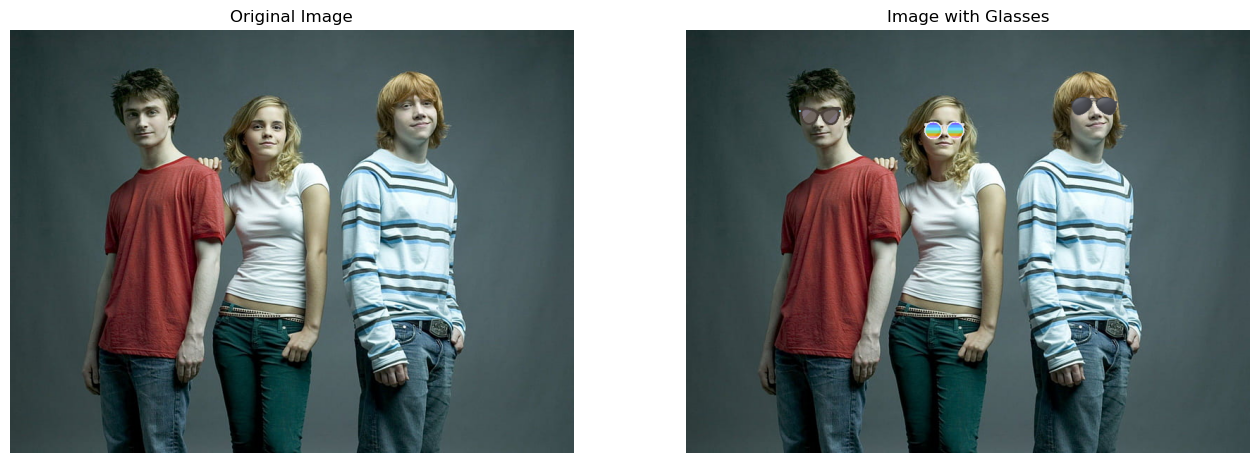

In [9]:
# Display the original and detected images using Matplotlib
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(single_face_with_stickers)
plt.title('Image with Glasses')
plt.axis('off')

plt.show()